In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

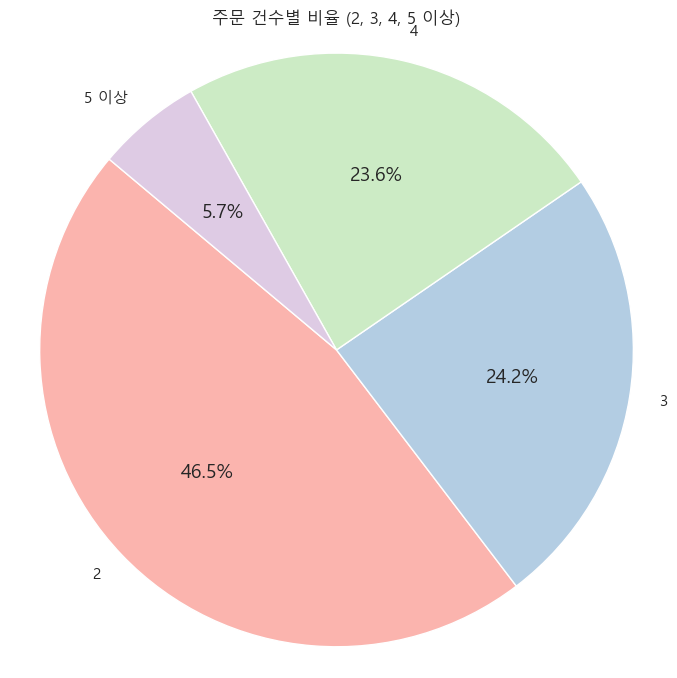

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 주문별 quantity 합계
order_quantities = df.groupby('order_id')['quantity'].sum()

# 2. 2 이상인 주문 필터링
filtered_orders = order_quantities[order_quantities >= 2]

# 3. 2, 3, 4, 5 이상 그룹으로 나누기
counts_2 = (filtered_orders == 2).sum()
counts_3 = (filtered_orders == 3).sum()
counts_4 = (filtered_orders == 4).sum()
counts_5_plus = (filtered_orders >= 5).sum()

# 4. 레이블과 데이터 준비
labels = ['2', '3', '4', '5 이상']
sizes = [counts_2, counts_3, counts_4, counts_5_plus]
colors = plt.cm.Pastel1.colors[:len(labels)]  # 색상 자동 선택

# 5. 원형 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('주문 건수별 비율 (2, 3, 4, 5 이상)')
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()


In [ ]:
결과 해석 : 주문 건수가 다수인 경우 2판을 주문하는 비율이 가장 높으며, 보통 3판이상으로 가는 경우 주문량이 많이 줄어들고 있다.

In [ ]:
인사이트 : 2판 전용 세트 추천

C:\Users\장소현\AppData\Local\Temp\ipykernel_28904\741723809.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Type', y='Ratio', data=summary, palette=['#4c72b0', '#dd8452'])


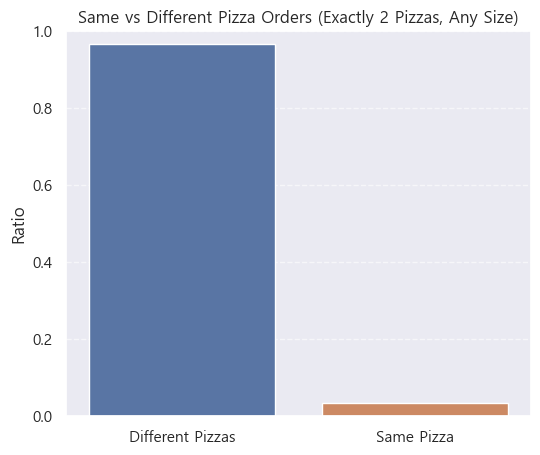

In [5]:

# 데이터 불러오기
df = pd.read_csv('Pizza Sales Dataset.csv')

# 1. 주문별 총 주문 수량이 정확히 2인 order_id만 필터링
order_quantities = df.groupby('order_id')['quantity'].sum()
orders_with_two_pizzas = order_quantities[order_quantities == 2].index

# 2. 해당 주문들만 추출
df_filtered = df[df['order_id'].isin(orders_with_two_pizzas)]

# 3. quantity가 2인 주문이 실제로 2개 피자인지 명확히 반영되도록 데이터 확장 (quantity 2일 수도 있음)
# -> quantity만큼 row를 복제해서 피자 한 판 = 한 행으로 처리
df_expanded = df_filtered.loc[df_filtered.index.repeat(df_filtered['quantity'])].reset_index(drop=True)

# 4. 주문별로 피자 이름 리스트로 수집
order_groups = df_expanded.groupby('order_id')['pizza_name'].agg(list).reset_index()

# 5. 피자가 정확히 2개인 주문만 필터링 (데이터 정합성 보장)
order_groups = order_groups[order_groups['pizza_name'].apply(len) == 2]

# 6. 피자 종류가 같은지/다른지 판별
def check_same_or_diff(pizza_names):
    return 'Same Pizza' if pizza_names[0] == pizza_names[1] else 'Different Pizzas'

order_groups['order_type'] = order_groups['pizza_name'].apply(check_same_or_diff)

# 7. 비율 집계
summary = order_groups['order_type'].value_counts(normalize=True).reset_index()
summary.columns = ['Order Type', 'Ratio']

# 8. 시각화
plt.figure(figsize=(6, 5))
sns.barplot(x='Order Type', y='Ratio', data=summary, palette=['#4c72b0', '#dd8452'])

plt.title('Same vs Different Pizza Orders (Exactly 2 Pizzas, Any Size)')
plt.ylim(0, 1)
plt.ylabel('Ratio')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
결과  해석 : 2가지 피자를 고른 경우 사이즈를 고려하지 않고, 다른 맛의 피자를 선택하는 경우가 대다수이다.

In [ ]:
인사이트 : 다양성 추구와 개인의 입맛 취향을 고려한 고객님들이 많음. 추천 조합 제시.

C:\Users\장소현\AppData\Local\Temp\ipykernel_28904\3143797118.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size Comparison', y='Ratio', data=summary, palette=['#55a868', '#c44e52'])


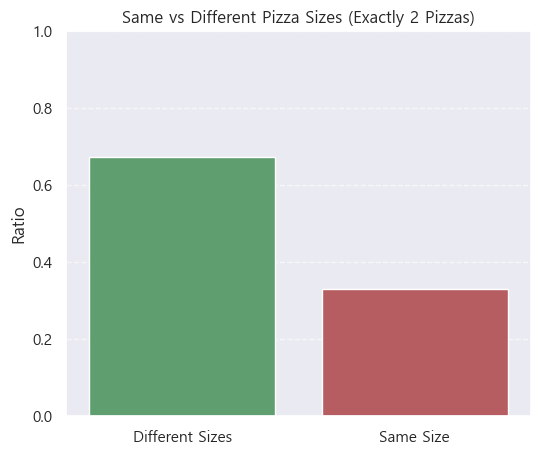

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('Pizza Sales Dataset.csv')

# 1. 주문별 총 수량이 정확히 2인 주문만 추출
order_quantities = df.groupby('order_id')['quantity'].sum()
orders_with_two_pizzas = order_quantities[order_quantities == 2].index

# 2. 해당 주문만 필터링
df_filtered = df[df['order_id'].isin(orders_with_two_pizzas)]

# 3. quantity만큼 행을 복제하여 피자 1판 = 1행 되도록 확장
df_expanded = df_filtered.loc[df_filtered.index.repeat(df_filtered['quantity'])].reset_index(drop=True)

# 4. 주문별로 피자 사이즈 리스트로 모음
order_groups = df_expanded.groupby('order_id')['pizza_size'].agg(list).reset_index()

# 5. 정확히 2개 피자만 있는 주문만 필터링
order_groups = order_groups[order_groups['pizza_size'].apply(len) == 2]

# 6. 같은 사이즈인지 판별
def same_size_or_diff(sizes):
    return 'Same Size' if sizes[0] == sizes[1] else 'Different Sizes'

order_groups['size_comparison'] = order_groups['pizza_size'].apply(same_size_or_diff)

# 7. 비율 계산
summary = order_groups['size_comparison'].value_counts(normalize=True).reset_index()
summary.columns = ['Size Comparison', 'Ratio']

# 8. 시각화
plt.figure(figsize=(6, 5))
sns.barplot(x='Size Comparison', y='Ratio', data=summary, palette=['#55a868', '#c44e52'])

plt.title('Same vs Different Pizza Sizes (Exactly 2 Pizzas)')
plt.ylim(0, 1)
plt.ylabel('Ratio')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
결과 해석 : 같은 사이즈의 피자를 선택하는 경우(약 35%) < 다른 사이즈의 피자를 선택하는 경우(약 65%)

In [ ]:
인사이트 : 가격 대비 양 조절을 위함과 메인 + 서브 조합인 경우.

In [8]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('Pizza Sales Dataset.csv')

# 1. 주문별 수량 합이 정확히 2인 주문만 추출
order_quantities = df.groupby('order_id')['quantity'].sum()
orders_with_two_pizzas = order_quantities[order_quantities == 2].index

# 2. 해당 주문만 필터링
df_filtered = df[df['order_id'].isin(orders_with_two_pizzas)]

# 3. quantity만큼 행을 복제하여 피자 1판 = 1행으로 확장
df_expanded = df_filtered.loc[df_filtered.index.repeat(df_filtered['quantity'])].reset_index(drop=True)

# 4. 주문별로 피자 사이즈 리스트 생성
order_groups = df_expanded.groupby('order_id')['pizza_size'].agg(list).reset_index()

# 5. 정확히 2개의 피자만 있는 주문만 필터링
order_groups = order_groups[order_groups['pizza_size'].apply(len) == 2]

# 6. 사이즈 조합 정렬해서 튜플화 (예: ('M', 'L')와 ('L', 'M')을 같게 처리)
order_groups['size_pair'] = order_groups['pizza_size'].apply(lambda x: tuple(sorted(x)))

# 7. 조합별 개수 세기
pair_counts = order_groups['size_pair'].value_counts().reset_index()
pair_counts.columns = ['Size Pair', 'Count']

# 8. 상위 5개 출력
print("가장 많이 나타난 사이즈 조합 Top 5:")
print(pair_counts.head())


가장 많이 나타난 사이즈 조합 Top 5:
  Size Pair  Count
0    (L, M)   1494
1    (L, S)   1351
2    (M, S)   1147
3    (L, L)    908
4    (M, M)    598


In [ ]:
결과 해석 : 보편적인 사이즈 M,L 사이즈를 가장 많이 주문하며, 동시에 같은 사이즈를 주문하는 경우보다 다른 사이즈를 선택하는 경우가 더 많다.

In [ ]:
인사이트 : '가심비' 소비 경향, 동일 메뉴 피로감 줄이기

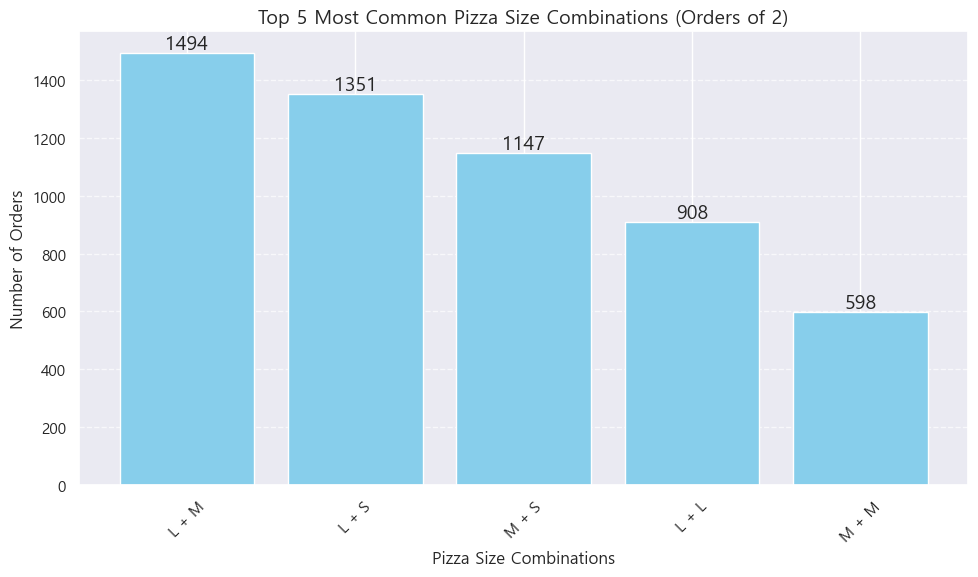

In [10]:
import matplotlib.pyplot as plt

# Top 5 사이즈 조합만 추출
top5_pairs = pair_counts.head(5)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(
    [f'{a} + {b}' for a, b in top5_pairs['Size Pair']],
    top5_pairs['Count'],
    color='skyblue'
)

# 제목 및 라벨 설정
plt.title('Top 5 Most Common Pizza Size Combinations (Orders of 2)', fontsize=14)
plt.xlabel('Pizza Size Combinations')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('Pizza Sales Dataset.csv')

# 1. 주문별 수량 합이 정확히 2인 주문만 추출
order_quantities = df.groupby('order_id')['quantity'].sum()
orders_with_two_pizzas = order_quantities[order_quantities == 2].index

# 2. 해당 주문만 필터링
df_filtered = df[df['order_id'].isin(orders_with_two_pizzas)]

# 3. quantity만큼 행 복제 (1판 = 1행)
df_expanded = df_filtered.loc[df_filtered.index.repeat(df_filtered['quantity'])].reset_index(drop=True)

# 4. 주문별로 피자 이름 리스트로 집계
order_groups = df_expanded.groupby('order_id')['pizza_name'].agg(list).reset_index()

# 5. 피자가 정확히 2개이고, 이름이 동일한 경우만 추출
same_pizza_orders = order_groups[
    order_groups['pizza_name'].apply(lambda x: len(x) == 2 and x[0] == x[1])
]

# 6. 어떤 피자들이 가장 많이 중복 주문되었는지 집계
same_pizza_counts = same_pizza_orders['pizza_name'].apply(lambda x: x[0]).value_counts().reset_index()
same_pizza_counts.columns = ['Pizza Name', 'Same-Pizza Order Count']

# 7. Top 5 출력
print("같은 종류의 피자 2개를 주문한 주문 건 Top 5 메뉴:")
print(same_pizza_counts.head(5))


같은 종류의 피자 2개를 주문한 주문 건 Top 5 메뉴:
                     Pizza Name  Same-Pizza Order Count
0    The Barbecue Chicken Pizza                      22
1  The California Chicken Pizza                      17
2        The Thai Chicken Pizza                      15
3            The Hawaiian Pizza                      15
4           The Pepperoni Pizza                      13


In [ ]:
결과 해석 : 치킨류 피자를 동시에 주문하는 경우가 많다. 1순위 바베큐 치킨 피자는 5순위인 페퍼로니 피자보다 약 170% 주문량을 가지고 있다.

In [ ]:
인사이트 : 단짠 조합의 맛 선호. 닭고기로 포만감을 주고, 가성비 있고, 무난하게 먹기에 좋음.
식사형 피자를 구성, AI 추천 메뉴 치킨 피자 종류로 다양성 고려.

In [11]:
import pandas as pd

# 1. 주문별 수량 합계 계산
order_quantities = df.groupby('order_id')['quantity'].sum()

# 2. 수량이 2 이상인 주문 전체 건수
orders_with_2_or_more = order_quantities[order_quantities >= 2]
total_2_or_more = len(orders_with_2_or_more)

# 3. 수량이 정확히 2인 주문 건수
orders_with_exactly_2 = order_quantities[order_quantities == 2]
total_exactly_2 = len(orders_with_exactly_2)

# 4. 비율 계산
percentage = (total_exactly_2 / total_2_or_more) * 100

# 5. 출력
print(f"수량이 2 이상인 주문 건수: {total_2_or_more}")
print(f"수량이 정확히 2인 주문 건수: {total_exactly_2}")
print(f"정확히 2인 주문 비율: {percentage:.2f}%")


수량이 2 이상인 주문 건수: 13239
수량이 정확히 2인 주문 건수: 6152
정확히 2인 주문 비율: 46.47%


In [ ]:
결과 해석 : 수량이 2개 이상일 경우 2개를 주문하는 경우가 절반을 차지한다.

In [ ]:
인사이트 : 가족 단위, 소규모 모임에서 주문 가능성 높음. 적당한 양을 추구함.

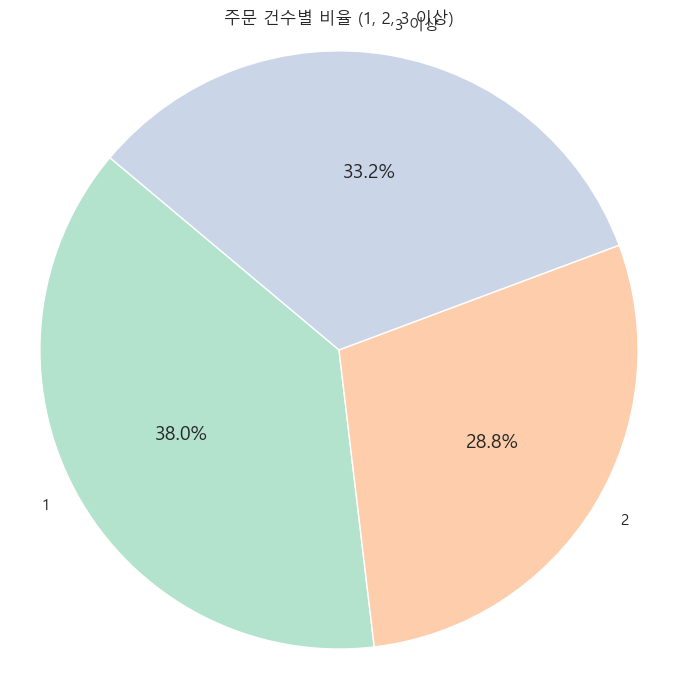

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 주문별 quantity 합계
order_quantities = df.groupby('order_id')['quantity'].sum()

# 2. 그룹별 주문 건수 계산
counts_1 = (order_quantities == 1).sum()
counts_2 = (order_quantities == 2).sum()
counts_3_plus = (order_quantities >= 3).sum()

# 3. 레이블과 데이터 준비
labels = ['1', '2', '3 이상']
sizes = [counts_1, counts_2, counts_3_plus]
colors = plt.cm.Pastel2.colors[:len(labels)]  # 색상 자동 선택

# 4. 원형 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('주문 건수별 비율 (1, 2, 3 이상)')
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()


In [ ]:
결과 해석 : 주문 건수가 1,2개 소주문인 경우가 대량주문인 경우에 비해 압도적으로 크다.

In [ ]:
인사이트 : 개인의 소비에 최적화

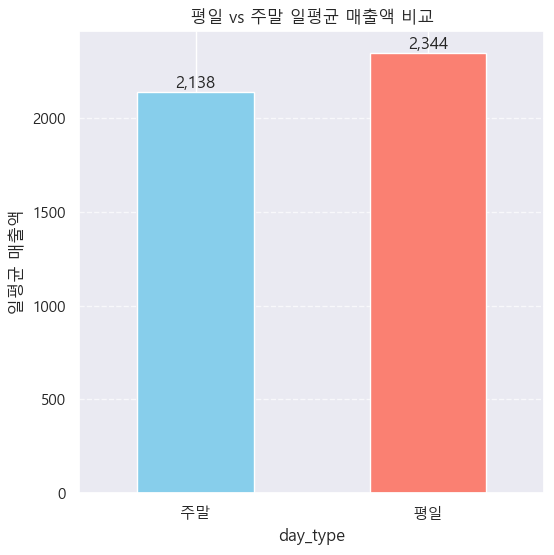

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 'order_date'를 datetime으로 변환
df['order_date'] = pd.to_datetime(df['order_date'])

# 평일과 주말 구분
df['day_type'] = df['order_date'].dt.dayofweek.apply(lambda x: '주말' if x >= 5 else '평일')

# 날짜별 총 매출액 집계
daily_sales = df.groupby(['order_date', 'day_type'])['total_price'].sum().reset_index()

# 평일과 주말 각각 일별 평균 매출액 계산
avg_sales = daily_sales.groupby('day_type')['total_price'].mean()

# 시각화
plt.figure(figsize=(6, 6))
avg_sales.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('평일 vs 주말 일평균 매출액 비교')
plt.ylabel('일평균 매출액')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(avg_sales):
    plt.text(i, v + max(avg_sales)*0.01, f'{v:,.0f}', ha='center', fontsize=12)

plt.show()


In [ ]:
결과 해석 : 주말보다 평일에 일평균 매출액이 더 높다.

In [ ]:
인사이트 : 
1. 고객 구성의 차이 - 평일은 직장인, 학생 등 일정한 소비층의 꾸준한 구매

주말은 가족 단위나 단체 방문이 많으나, 상대적으로 빈도가 적거나 평균 소비 단가가 낮을 가능성
2. 주말 외식 대체 경향 - 주말에는 외식, 모임 등 다양한 선택지가 많아 피자 주문이 분산될 수 있음

평일에는 간편하고 빠른 피자 주문이 더 선호될 가능성
